In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet 

train=pd.read_csv(r'C:\Users\Nayan\Documents\AirPassengers.csv')
train.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [2]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [3]:
train.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
train['Month'] = pd.DatetimeIndex(train['Month'])
train.dtypes



Month          datetime64[ns]
#Passengers             int64
dtype: object

In [5]:
train=train.rename(columns={'Month':'ds','#Passengers':'y'})
train.head()
train.info()
train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
ds    144 non-null datetime64[ns]
y     144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


ds    datetime64[ns]
y              int64
dtype: object

In [6]:
my_model = Prophet(interval_width=0.95)
my_model.fit(train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [8]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.511816,603.280944,696.164731
176,1963-09-01,601.983199,560.565511,645.936377
177,1963-10-01,565.980192,523.073432,609.163654
178,1963-11-01,534.021253,492.329436,578.568123
179,1963-12-01,563.611828,520.249227,605.617796


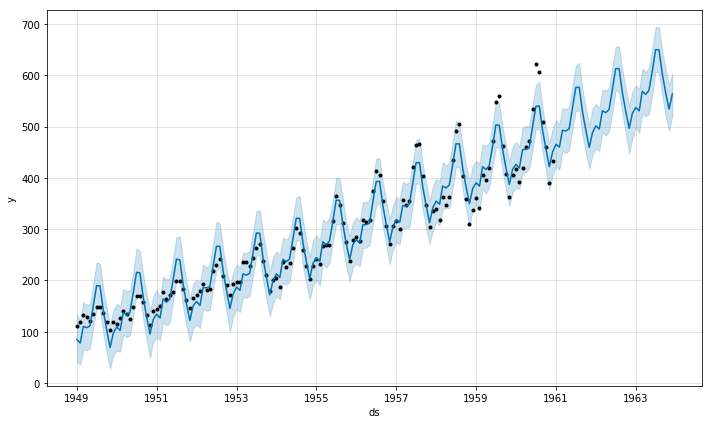

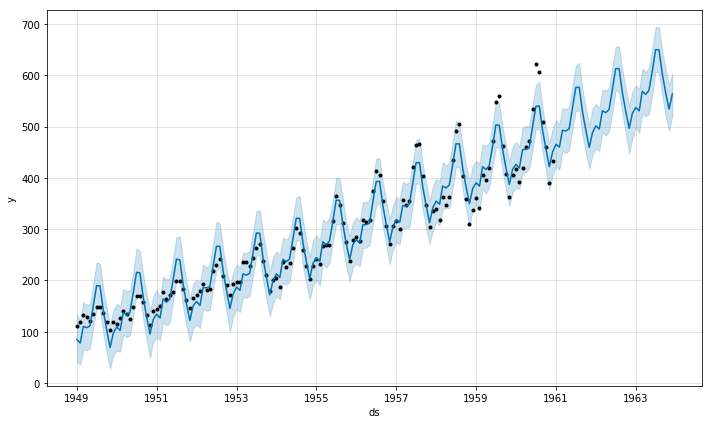

In [76]:
my_model.plot(forecast)


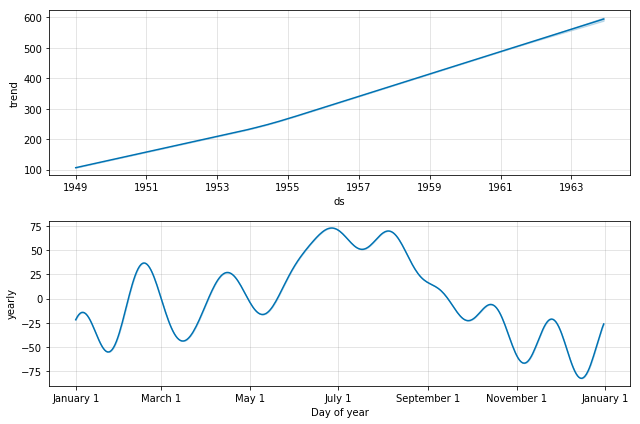

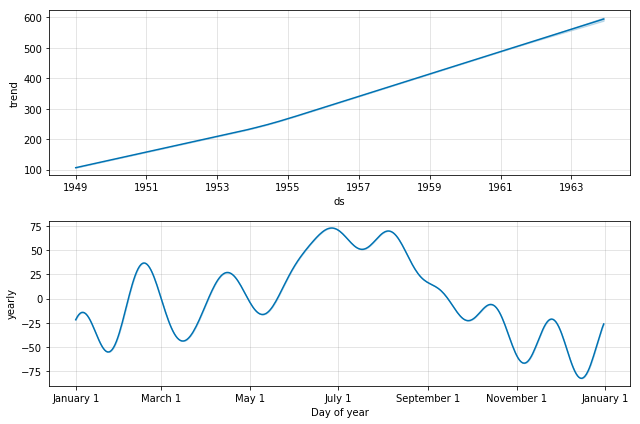

In [77]:
my_model.plot_components(forecast)